#### Copyright 2020 Google LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Regression Quality

So far in this course, we have spent some time building and testing regression models. But how can we measure how good these models are? In this Colab, we will examine a few of the ways that we can measure and graph the results of a regression model in order to better understand the quality of the model.

## Building a Dataset

In order to discuss regression quality, we should probably start by building a regression model.

We will start by creating an artificial dataset to model.

Start by importing [NumPy](http://numpy.org) and setting a random seed so that we get reproducible results.
 
Remember: **Do not set a random seed in production code!**

In [1]:
import numpy as np

np.random.seed(0xFACADE)

Recall that linear regression is about trying to fit a straight line through a set of data points. The equation for a straight line is:

> $y = m*x + b$

where:
- $x$ is the feature
- $y$ is the outcome
- $m$ is the slope of the line
- $b$ is the intercept of the line on the $y$-axis

But at this point we don't even have $x$-values!

We will use NumPy's [random.uniform](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.uniform.html) function to generate 50 random numbers between 0 and 200 as $x$-values.

In [2]:
X = np.random.uniform(low=0, high=200, size=50)

print(f'min: {np.min(X)}')
print(f'max: {np.max(X)}')
print(f'mean: {np.mean(X)}')
print(f'count: {np.size(X)}')

min: 2.1137646660836396
max: 195.5540654692904
mean: 103.84065098623267
count: 50


You should see a:

  * minimum value near, but not below 0
  * maximum value near, but not above 200
  * mean value somewhere near 100
  * count value of exactly 50

Let's visualize the $x$-values, just to get some idea of the distribution of the values in the range of 0-200.
 
*How do we plot a one-dimensional list of values in two-dimensional space?*
 
We can plot it against itself!

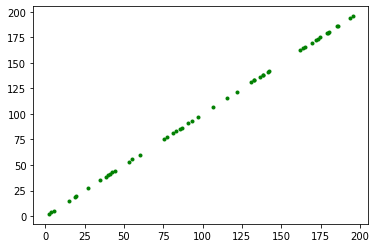

In [3]:
import matplotlib.pyplot as plt

plt.plot(X, X, 'g.')
plt.show()

As you can see, we have a straight line of $x$-values that span from roughly 0 to 200. Let's now create some $y$-values via the equation $y=4x+10$ (i.e. the slope is 4 and the intercept is 10).

We'll call the new variable `Y_PRED` since it is the predicted variable.

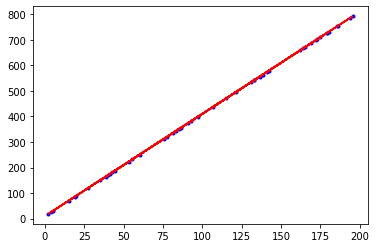

In [4]:
SLOPE = 4
INTERCEPT = 10

Y_PRED = (SLOPE * X) + INTERCEPT

plt.plot(X, Y_PRED, 'b.')
plt.plot(X, Y_PRED, 'r-')
plt.show()

This regression line fits amazingly well! If only we could have this perfect of a fit in the real world. Unfortunately, this is almost never the case. There is always some variability.
 
Let's add some randomness into our $y$-values to get a more realistic dataset. We will keep our original $y$-values in order to remember our base regression line.
 
We'll recreate our original $y$-values and store them in `Y_PRED`. Then, we'll create `Y` with the same equation but with added randomness.

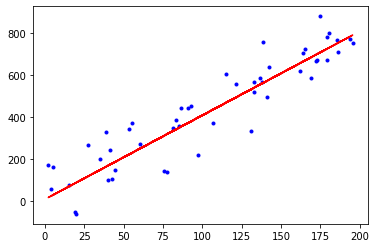

In [5]:
Y_PRED = (SLOPE * X) + INTERCEPT

randomness = np.random.uniform(low=-200, high=200, size=50)
Y = SLOPE * X + randomness + INTERCEPT

plt.plot(X, Y, 'b.')
plt.plot(X, Y_PRED, 'r-')
plt.show()

We now have the line that was used to generate the data plotted in red, and the randomly displaced data points in blue. The dots, though definitely not close to the line, at least follow the linear trend in general. This seems like a reasonable dataset for a linear regression.
 
Let's remind ourselves of the key variables in the model:
 
* `X`: the $x$-values that we used to "train" the model
* `Y`: the $y$-values that represent the actual values that correlate to `X`
* `Y_PRED`: the $y$-values that the model would predict for each $x$-value

## Coefficient of Determination


The **coefficient of determination**, denoted $R^2$, is one of the most important metrics in regression. It tells us how much of the data is "explained" by the model.

Before we can define the metric itself, we need to define a few other key terms.
 
A **residual** is the difference between the target value $y_i$ and the predicted value $\hat{y_i}$. The **residual sum of squares** is the summation of the square of every residual in the prediction set.
 
> $$ SS_{res} = \sum_{i}(y_i - \hat{y_i})^2$$

In [ ]:
ss_res = ((Y - Y_PRED) ** 2).sum(axis=0,  dtype=np.float64)
print(ss_res)

The **total sum of squares** is the sum of the squares of the difference between each value $y_i$ and their mean.

> $$\bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_{i}$$

> $$SS_{tot} = \sum_{i}(y_{i}-\bar{y})^2$$



In [ ]:
y_mean = np.average(Y, axis=0)
print(y_mean)

In [ ]:
ss_tot = ((Y - y_mean)**2).sum(axis=0, dtype=np.float64)
print(ss_tot)

Given the total sum of squares and the residual sum of squares, we can calculate the coefficient of determination $R^2$.

>  $$R^{2} = 1 - \frac{SS_{res}}{SS_{tot}}$$

In [ ]:
r2 = 1 - (ss_res/ss_tot)
print(r2)

If you just ran the cells in this Colab from top to bottom you probably got a score of `0.846`.
 
Is this good? Bad? Mediocre?
 
The $R^2$ score measures how well the actual variance from $x$-values to $y$-values is represented in the variance between the $x$-values and the predicted $y$-values.
 
Typically, this score ranges from 0 to 1, where 0 is bad and 1 is a perfect mapping. However, the score can also be negative. Can you guess why?
 
If a line drawn horizontally through the data points performs better than your regression, then the $R^2$ score would be negative. If you see this, try again. Your model *really* isn't working.
 
For values in the range 0-1, interpreting the $R^2$ is more subjective. The closer to 0, the worse your model is at fitting the data. And generally, the closer to 1, the better (but you also don't want to overfit). This is where testing, observation, and experience come into play.
 

It turns out that scikit-learn can calculate $R^2$ for us:

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(Y, Y_PRED))

Knowing that we don't have to manually do all of the math again, let's now see the perfect and a very imperfect case of a regression fitting a dataset.

To begin with, we'll show a perfect fit. What happens if our predictions and our actual values are identical?

In [ ]:
print(r2_score(Y, Y))
print(r2_score(Y_PRED, Y_PRED))

1.0: just what we thought! A perfect fit.

Now let's see if we can make a regression so poor that $R^2$ is negative.

In this case, we need to make our predicted data look different than our actuals. To do this, we'll negate our predictions and save them into a new variable called `Y_PRED_BAD`.

In [ ]:
Y_PRED_BAD = -Y_PRED
plt.plot(X, Y, 'y.')
plt.plot(X, Y_PRED_BAD, 'r-')

That prediction line looks horrible! Indeed, a horizontal line would fit this data better.

Let's check the $R^2$.

In [ ]:
print(r2_score(Y, Y_PRED_BAD))

A negative $R^2$ is rare in practice. But if you do ever see one, it means the model has gone quite wrong.

## Predicted vs. Actual Plots

We have now seen a quantitative way to measure the goodness-of-fit of our regressions: the coefficient of determination. We know that if we see negative numbers that our model is very broken and if we see numbers approaching 1, the model is decent (or overfitted). But what about the in-between?
 
This is where qualitative observations based on expert opinion needs to come into play.

There are numerous ways to visualize regression predictions, but one of the most basic is the "predicted vs. actual" plot.
 
To create this plot, we scatter-plot the actual $y$-values used to train our model against the predicted $y$-values generated from the training features. We then draw a line from the lowest prediction to the largest.


In [ ]:
plt.plot(Y_PRED, Y, 'b.')
plt.plot([Y_PRED.min(), Y_PRED.max()], [Y_PRED.min(), Y_PRED.max()], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In this case, the data points scatter pretty evenly around the prediction-to-actual line.

So what does a bad plot look like?

Let's first negate all of our predictions, making them exactly the opposite of what they should be. This creates the exact opposite of a good actual-vs-predicted line.

In [ ]:
Y_BAD = -Y_PRED

plt.plot(Y, Y_BAD, 'b.')
plt.plot([Y_BAD.min(), Y_BAD.max()], [Y_BAD.min(), Y_BAD.max()], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In this case we made a very contrived example where the predictions are exact opposites of the actual values. When you see this case, you have a model predicting roughly the opposite of what it should be predicting.

Let's look at another case, where we add a large positive bias to every prediction.

In [ ]:
Y_BAD = Y_PRED + 200

plt.plot(Y, Y_BAD, 'b.')
plt.plot([Y_BAD.min(), Y_BAD.max()], [Y_BAD.min(), Y_BAD.max()], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Now we have a situation where there is an obvious **bias**. All predictions are higher than the actual values, so the model needs to be adjusted to make smaller predictions.

Most cases aren't quite so obvious. In the chart below, you can see that the predictions are okay for low values, but tend to underpredict for larger target values.

In [ ]:
Y_BAD = Y_PRED - Y_PRED / 4

plt.plot(Y, Y_BAD, 'b.')
plt.plot([Y_BAD.min(), Y_BAD.max()], [Y_BAD.min(), Y_BAD.max()], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Predicted vs. actual charts are a useful tool for giving you a visual indication of how your model is performing. While single measures like $R^2$ give you an aggregated metric, charts allow you to see if there is a trend or outlier where your model isn't performing well.

If you identify problem areas, you can work on retraining your model.

## Residual Plots

Another helpful visualization tool is to plot the regression residuals. As a reminder, residuals are the difference between the actual values and the predicted values.
 
We plot residuals on the $y$-axis against the predicted values on the $x$-axis, and draw a horizontal line through $y=0$.
 
Cases where our predictions were too low are above the line. Cases where our predictions were too high are below the line.

In [ ]:
RESIDUALS = Y - Y_PRED
plt.plot(Y_PRED, RESIDUALS, 'b.')
plt.plot([0, Y_PRED.max()], [0, 0], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

In the "Predicted vs. Actual" section above, we plotted a case where there was a large positive bias in our predictions. Plotting the same biased data on a residual plot shows all of the residuals below the zero line.

In [ ]:
RESIDUALS = Y - (Y_PRED + 200)

plt.plot(Y_PRED, RESIDUALS, 'b.')
plt.plot([0, Y_PRED.max()], [0, 0], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

The other example in the "Predicted vs. Actual" section reduced our predictions by an amount proportional to the scale of the predictions. Below is the residual plot for that scenario.

In [ ]:
RESIDUALS = Y - (Y_PRED - Y_PRED / 4)

plt.plot(Y_PRED, RESIDUALS, 'b.')
plt.plot([0, Y_PRED.max()], [0, 0], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

## Resources

* [Coefficient of Determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)
* [Interpreting Residual Plots](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#gallery)

# Exercises

The [Interpreting Residual Plots](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#gallery) resource gives examples of patterns in different residual plots and what those patterns might mean for your model.
 
Each exercise below contains code that generates an image. Run the code to view the image, and then find the corresponding pattern name in [Interpreting Residual Plots](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#gallery). Note the name of the pattern in the answer cell, and provide a one or two sentence explanation of what this could signal about your model's predictions.

## Exercise 1

Run the code below to generate an image. Identify the corresponding residual plot pattern, and write a sentence or two about what this could signal about the model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

x = np.linspace(-10.0, 10.0, 100)
y = np.linspace(-10.0, 10.0, 100)
f = x**2 + y**2 + np.random.uniform(low=-14, high=14, size=100)
plt.plot(x, f, 'b.')
plt.plot([x.min(), x.max()], [0, 0], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

### **Student Solution**

*Which [plot pattern](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#gallery) does this residual plot follow? And what might it mean about the model?*

---

## Exercise 2

Run the code below to generate an image. Identify the corresponding residual plot pattern, and write a sentence or two about what this could signal about the model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

x = np.linspace(0.0, 10.0, 100)
y = np.concatenate([
    np.random.uniform(low=-5, high=5, size=90),
    np.random.uniform(low=50, high=55, size=10)
])
plt.plot(x, y, 'b.')
plt.plot([x.min(), x.max()], [0, 0], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

### **Student Solution**

*Which [plot pattern](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#gallery) does this residual plot follow? And what might it mean about the model?*

---

## Exercise 3

Run the code below to generate an image. Identify the corresponding residual plot pattern, and write a sentence or two about what this could signal about the model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

x = np.concatenate([
    np.random.uniform(low=0, high=2, size=90),
    np.random.uniform(low=4, high=10, size=10)
])
y = np.random.uniform(low=-5, high=5, size=100)
plt.plot(x, y, 'b.')
plt.plot([x.min(), x.max()], [0, 0], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

### **Student Solution**

*Which [plot pattern](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#gallery) does this residual plot follow? And what might it mean about the model?*

---